In [1]:
#FEATURES:
#TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

#RESTAURANT_ID: A unique ID for each restaurant.

#CUISINES: The variety of cuisines that the restaurant offers.

#TIME: The open hours of the restaurant.

#CITY: The city in which the restaurant is located.

#LOCALITY: The locality of the restaurant.

#RATING: The average rating of the restaurant by customers.

#VOTES: The overall votes received by the restaurant.

#COST: The average cost of a two-person meal.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_excel('DataR_Train.xlsx')
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df2 = pd.read_excel('DataR_Test.xlsx')
df2

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [5]:
#By converting the Both the datasets into one dataset and listing out(adding the new column as "input")
#combining the two datasets into one dataset using concat.

df1 = pd.read_excel('DataR_Train.xlsx')
df1["input"]="train"
df2 = pd.read_excel('DataR_Test.xlsx')
df2["input"]="test"
df=pd.concat([df1,df2])
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,input
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train
...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
4227,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test
4228,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
4229,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,test


In [6]:
#EDA Process

df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,input
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train


In [7]:
df.tail()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,input
4226,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
4227,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test
4228,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
4229,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,test
4230,Bandra West,NaN,Mughlai,Perry Cross Road,3.7,2421,5pm – 1am (Mon-Sun),QUICK BITES,63 votes,test


In [8]:
df.isnull().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
input               0
dtype: int64

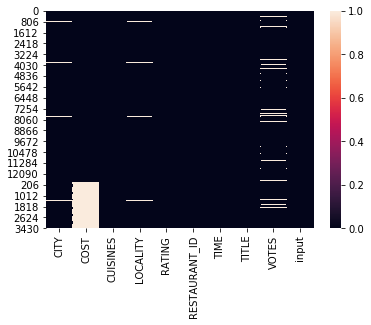

In [10]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [14]:
#Filling Null Values with Mode
for column in ['CITY','LOCALITY','RATING','VOTES','COST']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [15]:
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,input
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train
...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,300.0,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
4227,Bangalore,300.0,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test
4228,Faridabad,300.0,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
4229,Kochi,300.0,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,44 votes,test


In [16]:
df.isnull().sum()

CITY             0
COST             0
CUISINES         0
LOCALITY         0
RATING           0
RESTAURANT_ID    0
TIME             0
TITLE            0
VOTES            0
input            0
dtype: int64

In [17]:
#Check uniqueness of all columns
df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [18]:
df['RESTAURANT_ID'].unique()

array([ 9438, 13198, 10915, ...,  8617,  6485,  2421], dtype=int64)

In [19]:
#Here all values of RESTAURANT_ID's are unique 
df.drop('RESTAURANT_ID',axis=1,inplace=True)
df

,CITY,COST,CUISINES,LOCALITY,RATING,TIME,TITLE,VOTES,input
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train
...,...,...,...,...,...,...,...,...,...
4226,New Delhi,300.0,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
4227,Bangalore,300.0,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,11am – 1am (Mon-Sun),None,469 votes,test
4228,Faridabad,300.0,"Continental, North Indian",Sector 86,3.7,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
4229,Kochi,300.0,"Rolls, Beverages",Kochi,-,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,44 votes,test


In [20]:
df['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'European, Mediterranean, Italian, Sushi',
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food'],
      dtype=object)

In [21]:
df['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...',
       '6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), 6am...',
       '11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun), 3pm...'],
      dtype=object)

In [22]:
#Time has many unique values and it will not depend upon Price
df.drop('TIME',axis=1,inplace=True)

In [23]:
df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powa

In [24]:
df['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ...,
       'Off Carter Road', 'SRM Back Gate', 'Perry Cross Road'],
      dtype=object)

In [25]:
df['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [26]:
#no need of input column to predict, so am delecting
df.drop('input',axis=1,inplace=True)

In [27]:
df

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,DESSERT PARLOR,165 votes
...,...,...,...,...,...,...,...
4226,New Delhi,300.0,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,CASUAL DINING,287 votes
4227,Bangalore,300.0,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,None,469 votes
4228,Faridabad,300.0,"Continental, North Indian",Sector 86,3.7,QUICK BITES,53 votes
4229,Kochi,300.0,"Rolls, Beverages",Kochi,-,QUICK BITES,44 votes


In [28]:
#Convert TITLE Column into Numeric using label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
array = df['TITLE']

array.shapearray = df['TITLE']

array.shape

(16921,)

In [29]:
le=LabelEncoder()
data1=le.fit_transform(df['TITLE'])
data1

array([ 34,  36,  34, ..., 104, 104, 104])

In [30]:
df['TITLE']=data1

In [31]:
#Convert CUISINES Column into Numeric
array = df['CUISINES']

array.shapearray = df['CUISINES']

array.shape

(16921,)

In [33]:
le=LabelEncoder()
data1=le.fit_transform(df['CUISINES'])
data1

array([3294,  364, 3729, ..., 2089, 4580, 3491])

In [35]:
df['CUISINES']=data1

In [36]:
#Convert CITY column into Numeri
array = df['CITY']

array.shapearray = df['CITY']

array.shape

(16921,)

In [37]:
le=LabelEncoder()
data1=le.fit_transform(df['CITY'])
data1

array([400,  75,  75, ..., 128, 216,  40])

In [38]:
df['CITY']=data1

In [40]:
#Convert LOCALITY column into Numeric
array = df['LOCALITY']

array.shapearray = df['LOCALITY']

array.shape

(16921,)

In [41]:
le=LabelEncoder()
data1=le.fit_transform(df['LOCALITY'])
data1

array([ 328, 1214, 1272, ..., 1370,  642, 1148])

In [42]:
df['LOCALITY']=data1

In [43]:
df

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES
0,400,1200.0,3294,328,3.6,34,49 votes
1,75,1500.0,364,1214,4.2,36,30 votes
2,75,800.0,3729,1272,3.8,34,221 votes
3,277,800.0,5156,161,4.1,104,24 votes
4,277,300.0,2218,709,3.8,55,165 votes
...,...,...,...,...,...,...,...
4226,316,300.0,4259,1184,3.9,34,287 votes
4227,42,300.0,785,461,4.3,95,469 votes
4228,128,300.0,2089,1370,3.7,104,53 votes
4229,216,300.0,4580,642,-,104,44 votes


In [44]:
array = df['VOTES']

array.shapearray = df['VOTES']

array.shape

(16921,)

In [45]:
le=LabelEncoder()
data1=le.fit_transform(df['VOTES'])
data1

array([1470, 1105,  822, ..., 1526, 1384, 1656])

In [47]:
df['VOTES']=data1

In [48]:
df

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES
0,400,1200.0,3294,328,3.6,34,1470
1,75,1500.0,364,1214,4.2,36,1105
2,75,800.0,3729,1272,3.8,34,822
3,277,800.0,5156,161,4.1,104,908
4,277,300.0,2218,709,3.8,55,535
...,...,...,...,...,...,...,...
4226,316,300.0,4259,1184,3.9,34,1060
4227,42,300.0,785,461,4.3,95,1436
4228,128,300.0,2089,1370,3.7,104,1526
4229,216,300.0,4580,642,-,104,1384


In [49]:
df.dtypes

CITY          int32
COST        float64
CUISINES      int32
LOCALITY      int32
RATING       object
TITLE         int32
VOTES         int32
dtype: object

In [50]:
df['RATING'].mode()

0    3.9
dtype: object

In [51]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [52]:
df['RATING']

0       3.6
1       4.2
2       3.8
3       4.1
4       3.8
       ... 
4226    3.9
4227    4.3
4228    3.7
4229      -
4230    3.7
Name: RATING, Length: 16921, dtype: object

In [53]:
df.replace({'NEW': 3.9, '-': 3.9},inplace=True)

In [54]:
df

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES
0,400,1200.0,3294,328,3.6,34,1470
1,75,1500.0,364,1214,4.2,36,1105
2,75,800.0,3729,1272,3.8,34,822
3,277,800.0,5156,161,4.1,104,908
4,277,300.0,2218,709,3.8,55,535
...,...,...,...,...,...,...,...
4226,316,300.0,4259,1184,3.9,34,1060
4227,42,300.0,785,461,4.3,95,1436
4228,128,300.0,2089,1370,3.7,104,1526
4229,216,300.0,4580,642,3.9,104,1384


In [55]:
#Convert RATING column into Numeri
data2 = pd.get_dummies(df['RATING'])

In [56]:
df['RATING'] = data2

In [57]:
df.dtypes

CITY          int32
COST        float64
CUISINES      int32
LOCALITY      int32
RATING        uint8
TITLE         int32
VOTES         int32
dtype: object

In [58]:
df = pd.DataFrame(data=df)
df

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES
0,400,1200.0,3294,328,0,34,1470
1,75,1500.0,364,1214,0,36,1105
2,75,800.0,3729,1272,0,34,822
3,277,800.0,5156,161,0,104,908
4,277,300.0,2218,709,0,55,535
...,...,...,...,...,...,...,...
4226,316,300.0,4259,1184,0,34,1060
4227,42,300.0,785,461,0,95,1436
4228,128,300.0,2089,1370,0,104,1526
4229,216,300.0,4580,642,1,104,1384


In [59]:
df.shape

(16921, 7)

In [60]:
df.describe()

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,174.967732,566.423438,2801.322380,751.936647,0.094675,65.004137,1137.751788
std,106.862761,564.353009,1504.771403,459.011780,0.292775,35.875571,550.765711
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,300.000000,1478.000000,389.000000,0.000000,34.000000,715.000000
50%,160.000000,350.000000,3054.000000,666.000000,0.000000,64.000000,1279.000000
75%,277.000000,600.000000,4008.000000,1171.000000,0.000000,104.000000,1542.000000
max,449.000000,14000.000000,5182.000000,1635.000000,1.000000,122.000000,2074.000000


In [61]:
#co-relation

dfcor = df.corr()
dfcor

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES
CITY,1.000000,0.036909,0.022093,0.041355,0.082709,-0.016502,0.012818
COST,0.036909,1.000000,-0.012126,-0.011532,-0.109123,-0.219807,-0.014924
CUISINES,0.022093,-0.012126,1.000000,0.018479,-0.005160,0.248437,0.003028
LOCALITY,0.041355,-0.011532,0.018479,1.000000,0.011673,0.029390,0.007705
RATING,0.082709,-0.109123,-0.005160,0.011673,1.000000,0.054712,0.144589
TITLE,-0.016502,-0.219807,0.248437,0.029390,0.054712,1.000000,0.009673
VOTES,0.012818,-0.014924,0.003028,0.007705,0.144589,0.009673,1.000000


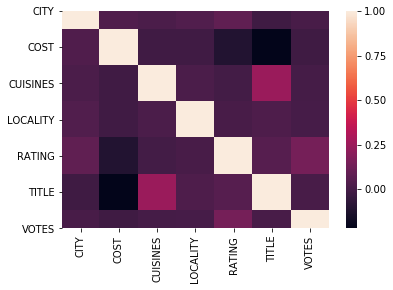

In [62]:
sns.heatmap(dfcor)

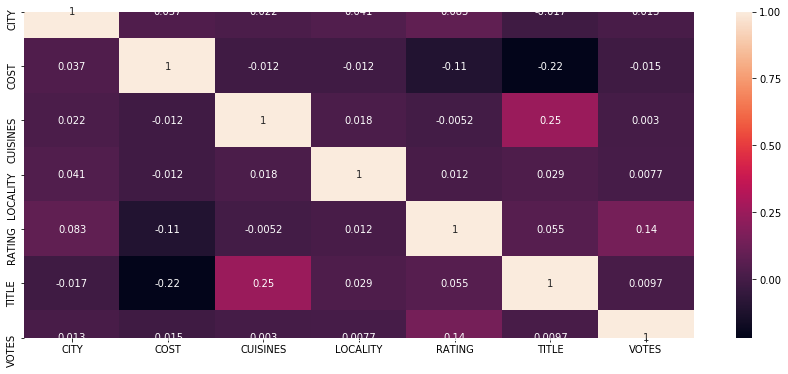

In [64]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,color='red',annot=True)

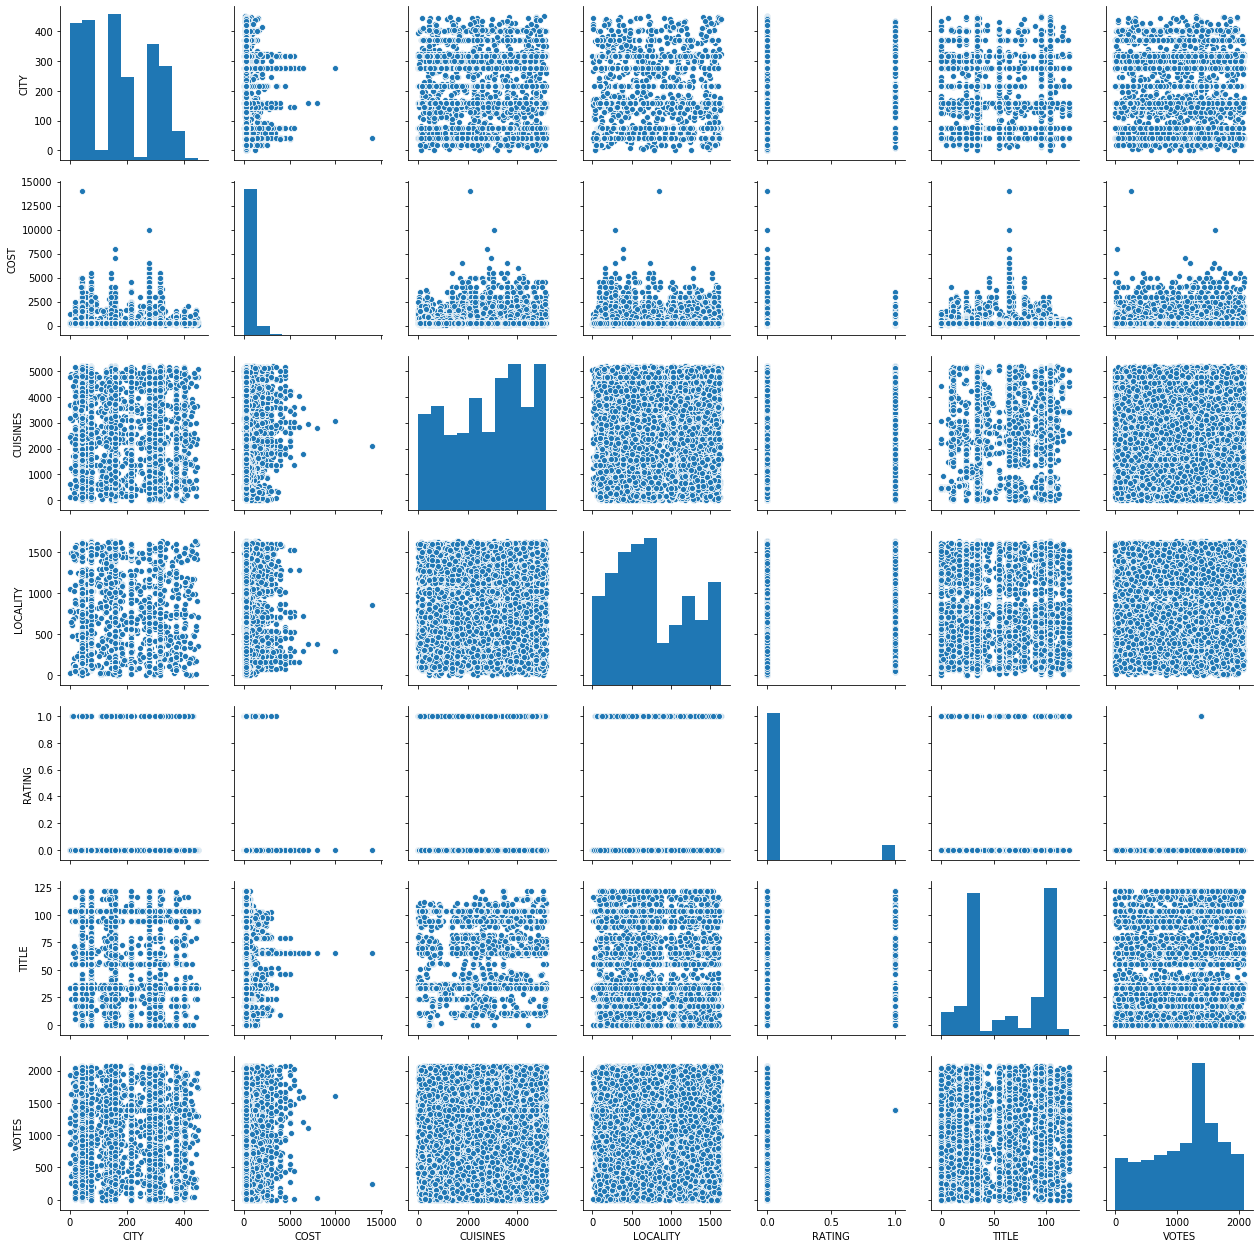

In [65]:
sns.pairplot(df)

In [66]:
#finding the skewness

df.skew()

CITY        0.254523
COST        4.505622
CUISINES   -0.229200
LOCALITY    0.370844
RATING      2.769180
TITLE      -0.061023
VOTES      -0.388760
dtype: float64

In [67]:
#there is a some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

CITY        0.254523
COST        0.851545
CUISINES   -0.229200
LOCALITY    0.370844
RATING      2.769180
TITLE      -0.061023
VOTES      -0.388760
dtype: float64

In [68]:
#finding/removing the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (16921, 7)
df1.shape: (15199, 7)
z value is: [[2.10586846 1.53484398 0.32741995 ... 0.32338215 0.86423859 0.60326564]
 [0.93550537 1.87266395 1.6197772  ... 0.32338215 0.8084887  0.05946767]
 [0.93550537 0.92117713 0.61650895 ... 0.32338215 0.86423859 0.57331296]
 ...
 [0.43952748 0.56167317 0.4733898  ... 0.32338215 1.08700752 0.70494527]
 [0.38398297 0.56167317 1.18206006 ... 3.0923166  1.08700752 0.44711478]
 [1.26303793 0.56167317 0.45834071 ... 0.32338215 1.08700752 0.94098728]]


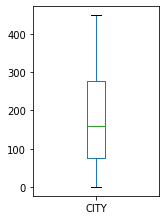

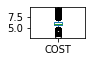

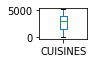

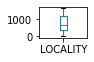

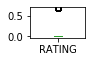

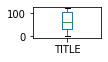

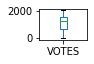

In [69]:
#Boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

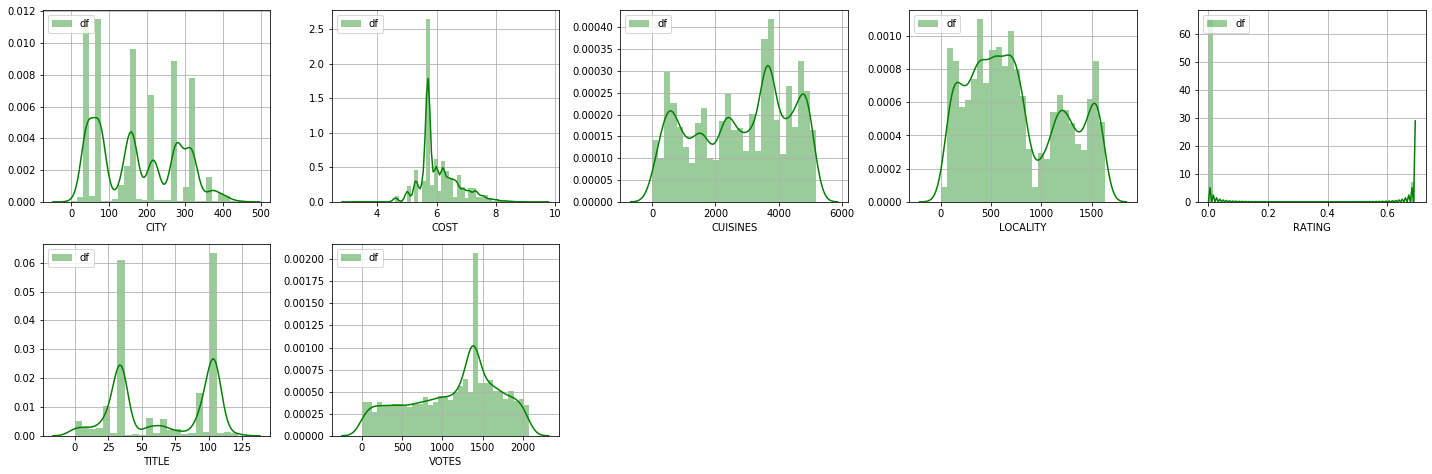

In [70]:
#Plotting Displot Through Iteratio
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

In [71]:
df.keys()

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'TITLE', 'VOTES'], dtype='object')

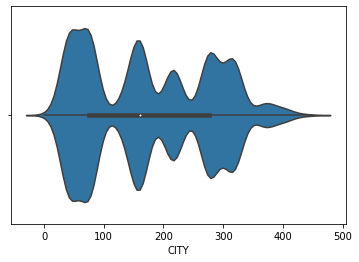

In [72]:
#violin plot representation with respect to each column

sns.violinplot(x="CITY",data=df)

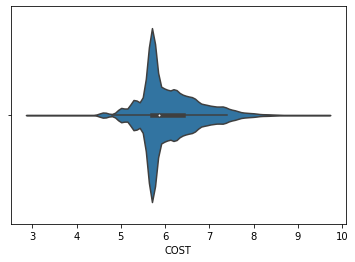

In [73]:
sns.violinplot(x="COST",data=df)

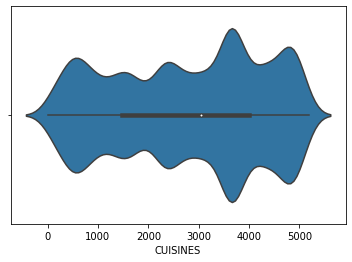

In [74]:
sns.violinplot(x="CUISINES",data=df)

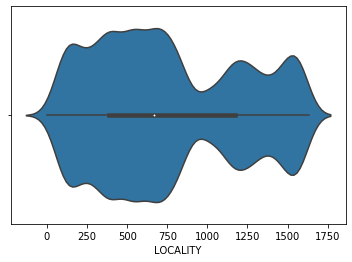

In [75]:
sns.violinplot(x="LOCALITY",data=df)

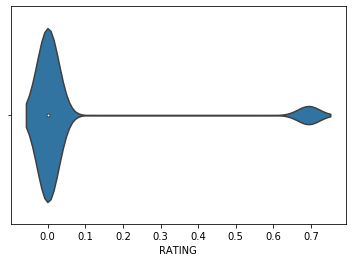

In [76]:
sns.violinplot(x="RATING",data=df)

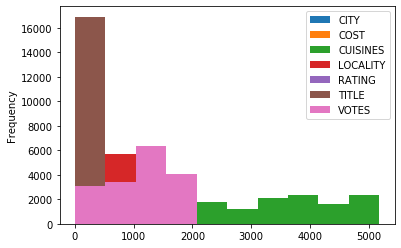

In [77]:
df.plot.hist()

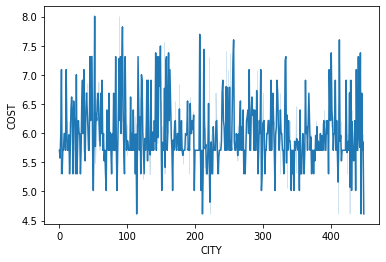

In [79]:
#Line plot representation
sns.lineplot(df["CITY"],df["COST"])
plt.show()

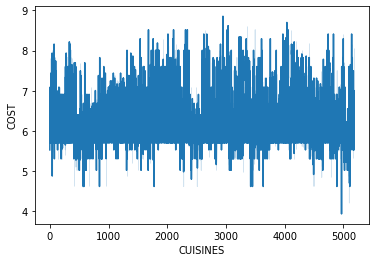

In [80]:
#Line plot representation
sns.lineplot(df["CUISINES"],df["COST"])
plt.show()

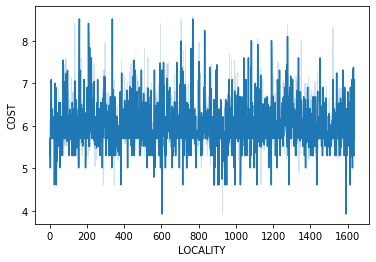

In [81]:
#Line plot representation
sns.lineplot(df["LOCALITY"],df["COST"])
plt.show()

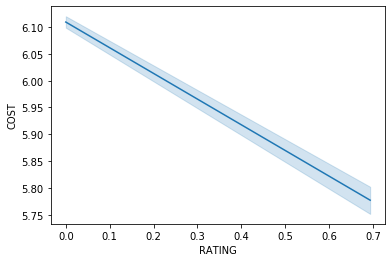

In [82]:
#Line plot representation
sns.lineplot(df["RATING"],df["COST"])
plt.show()

In [83]:
df.keys()

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'TITLE', 'VOTES'], dtype='object')

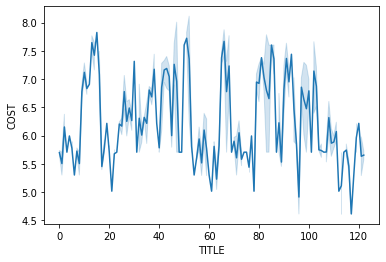

In [84]:
sns.lineplot(df["TITLE"],df["COST"])
plt.show()

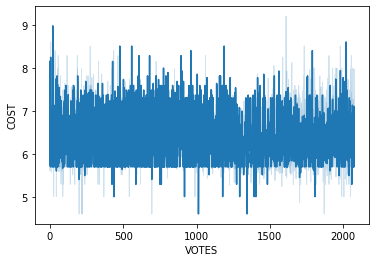

In [85]:
sns.lineplot(df["VOTES"],df["COST"])
plt.show()

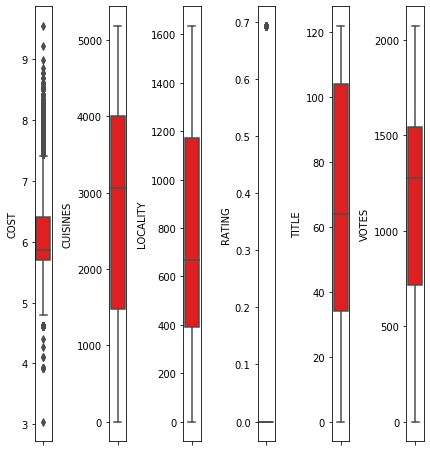

In [86]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

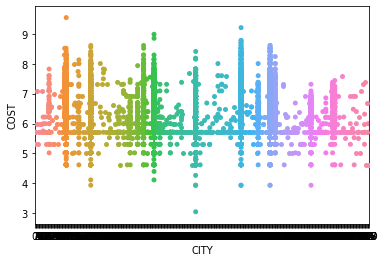

In [88]:
#strip plot representation

ax=sns.stripplot(x='CITY',y="COST",data=df);

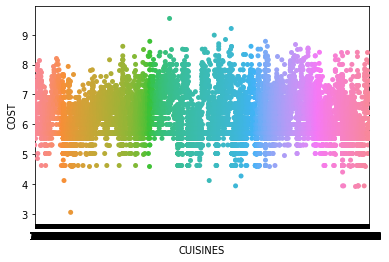

In [89]:
ax=sns.stripplot(x='CUISINES',y="COST",data=df);

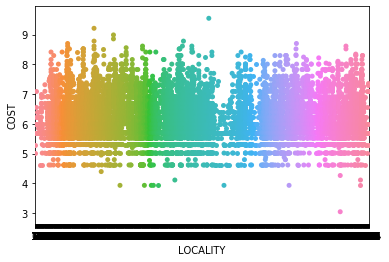

In [90]:
ax=sns.stripplot(x='LOCALITY',y="COST",data=df);

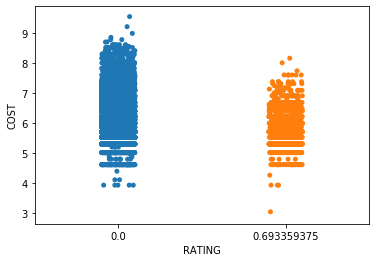

In [91]:
ax=sns.stripplot(x='RATING',y="COST",data=df);

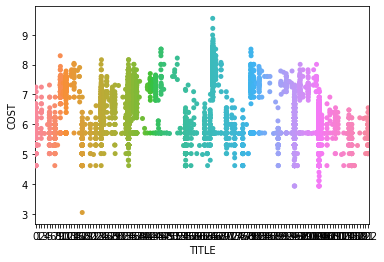

In [92]:
ax=sns.stripplot(x='TITLE',y="COST",data=df);

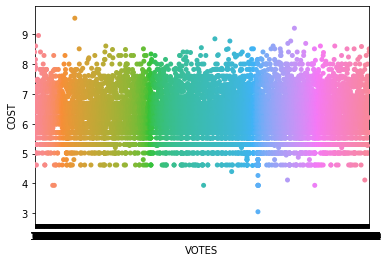

In [93]:
ax=sns.stripplot(x='VOTES',y="COST",data=df);

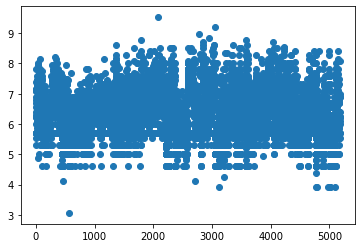

In [94]:
#using Scatter Plot
plt.scatter(df['CUISINES'],df['COST'])

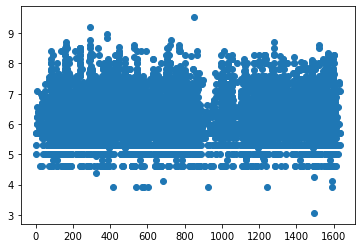

In [95]:
plt.scatter(df['LOCALITY'],df['COST'])

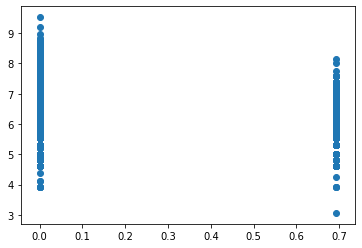

In [96]:
plt.scatter(df['RATING'],df['COST'])

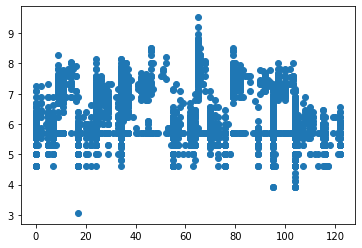

In [97]:
plt.scatter(df['TITLE'],df['COST'])

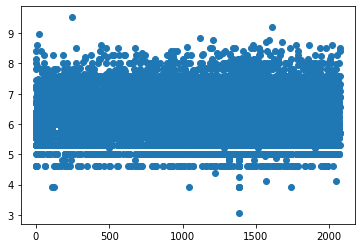

In [98]:
plt.scatter(df['VOTES'],df['COST'])

In [99]:
#Separating X and Y Variable to predict the dataset

X = df.drop("COST", axis=1)
X

,CITY,CUISINES,LOCALITY,RATING,TITLE,VOTES
0,400,3294,328,0.000000,34,1470
1,75,364,1214,0.000000,36,1105
2,75,3729,1272,0.000000,34,822
3,277,5156,161,0.000000,104,908
4,277,2218,709,0.000000,55,535
...,...,...,...,...,...,...
4226,316,4259,1184,0.000000,34,1060
4227,42,785,461,0.000000,95,1436
4228,128,2089,1370,0.000000,104,1526
4229,216,4580,642,0.693359,104,1384


In [100]:
Y = df["COST"]
Y

0       7.090910
1       7.313887
2       6.685861
3       6.685861
4       5.707110
          ...   
4226    5.707110
4227    5.707110
4228    5.707110
4229    5.707110
4230    5.707110
Name: COST, Length: 16921, dtype: float64

In [101]:
X.shape

(16921, 6)

In [102]:
Y.shape

(16921,)

In [103]:
Y = Y.values.reshape(-1,1)
Y


array([[7.09090982],
       [7.31388683],
       [6.68586095],
       ...,
       [5.70711026],
       [5.70711026],
       [5.70711026]])

In [104]:
Y.shape

(16921, 1)

In [105]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.35,random_state=39)

In [106]:
train_X.shape

(10998, 6)

In [107]:
train_Y.shape

(10998, 1)

In [108]:
test_Y.shape

(5923, 1)

In [109]:
test_X.shape

(5923, 6)

In [110]:
#Applying the regression techinque
#Linear Regression

lg=LinearRegression()
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
lg.coef_

array([[ 2.98192637e-04,  1.91241413e-05, -1.56143595e-05,
        -4.50195158e-01, -6.03445444e-03, -1.25845770e-06]])

In [112]:
lg.intercept_

array([6.40705253])

In [113]:
pred=lg.predict(test_X)
print(pred)

[[5.98803034]
 [5.92732139]
 [6.24077988]
 ...
 [5.87981203]
 [5.8722831 ]
 [5.84635432]]


In [114]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result:",pred)
print("actual result",test_Y)

Predicted result: [[5.98803034]
 [5.92732139]
 [6.24077988]
 ...
 [5.87981203]
 [5.8722831 ]
 [5.84635432]]
actual result [[6.2166061 ]
 [5.86078622]
 [6.47850964]
 ...
 [5.70711026]
 [5.70711026]
 [5.70711026]]


In [115]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.4690855160929337
Mean sqaured error: 0.3760940924775769
Root mean squared error: 0.6132651078266046


In [116]:
#Boost through GradientBoostRegressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [117]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.4191687443704092
Mean squared error: 0.25
R2 Score: 0.40


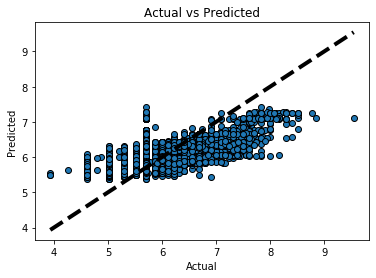

In [118]:
#visuvalize the pridicted value
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [119]:
#using Recurrsion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [120]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [121]:
# Lets use LinearRegression and check the max r2 score with diff levels
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.11964508933493379
r2 score corresponding to  43 is 0.11677363466942436
r2 score corresponding to  44 is 0.12572069293714516
r2 score corresponding to  45 is 0.12089077623630962
r2 score corresponding to  46 is 0.13616357508950105
r2 score corresponding to  47 is 0.12598830911807446
r2 score corresponding to  48 is 0.12930260926509451
r2 score corresponding to  49 is 0.11441141765533747
r2 score corresponding to  50 is 0.1263357051935423
r2 score corresponding to  51 is 0.1039541038501186
r2 score corresponding to  52 is 0.12033003452287805
r2 score corresponding to  53 is 0.12301684505676458
r2 score corresponding to  54 is 0.11951090197628556
r2 score corresponding to  55 is 0.11287436946762064
r2 score corresponding to  56 is 0.13350185418110627
r2 score corresponding to  57 is 0.12268313481509285
r2 score corresponding to  58 is 0.12291181240223292
r2 score corresponding to  59 is 0.12492343464235323
r2 score corresponding to  60 is 0.1203105018330

In [122]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -2.374315861859892e+28
std deviation in r2 score for ada boosting Regression:  4.991765924785085e+28


In [123]:
#KNN Model to predict
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.43
R2 Score of linear svc: 0.00


In [124]:
#use grid_search to find optimal value of n_neighbors for KNN Modl
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 29}

In [125]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=29)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.10923295822196999
r2 score corresponding to  43 is 0.07815954709899875
r2 score corresponding to  44 is 0.10616940045033751
r2 score corresponding to  45 is 0.11043211127121799
r2 score corresponding to  46 is 0.09742162935204912
r2 score corresponding to  47 is 0.10762358416215889
r2 score corresponding to  48 is 0.10982164957057294
r2 score corresponding to  49 is 0.10847257840070479
r2 score corresponding to  50 is 0.10499317300053634
r2 score corresponding to  51 is 0.09992386152496446
r2 score corresponding to  52 is 0.10551694215698004
r2 score corresponding to  53 is 0.10287259360448542
r2 score corresponding to  54 is 0.10420428172596208
r2 score corresponding to  55 is 0.09464280501324651
r2 score corresponding to  56 is 0.11050533213036762
r2 score corresponding to  57 is 0.11369328106676724
r2 score corresponding to  58 is 0.12588565093094184
r2 score corresponding to  59 is 0.1016411452004663
r2 score corresponding to  60 is 0.104161082319

In [126]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -1.8637825013697274e+28
Standard deviation in r2 scorefor Linear Regression: 3.7275650027394547e+28

Mean r2 score for KNN Regression:  -1.782364521730248e+28
Stadard deviation in r2 score for KNN Regression: 3.564729043460496e+28


In [127]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -1.8637825013697274e+28
std deviation in r2 scorefor Linear Regression: 3.7275650027394547e+28

Mean r2 score for KNN Regression:  -1.782364521730248e+28
std deviation in r2 score for KNN Regression: 3.564729043460496e+28


In [128]:
#Boosting KNN model
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -2.4132738815046823e+28
std deviation in r2 score for ada boosting Regression:  4.9189151671017065e+28


In [129]:
#check lasso regression and best value of alph
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=15)
clf.fit(X,Y)
clf.best_params_

{'alpha': 1}

In [130]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 1)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -1.6956516680434022e+28
std deviation in r2 score for Lasso Regression:  3.3913033360868044e+28


In [131]:
#Boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada3=AdaBoostRegressor()
add3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada3,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -2.4387232143311115e+28
std deviation in r2 score for ada boosting Regression:  4.8230649069684765e+28


In [132]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "rbf")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.43
R2 Score of linear svc: 0.00


In [133]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor
ada4=AdaBoostRegressor()
add4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada4,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -2.3889336636533144e+28
std deviation in r2 score for ada boosting Regression:  4.947857158045689e+28


In [134]:
#Decision Tree Regressorr
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 1)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y4))
print('R2 Score : %.2f' % r2_score(test_Y, y4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [135]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result :",y4)
print("actual price",test_Y)

Predicted result : [5.99396143 5.70711026 7.43897159 ... 5.30330491 5.70711026 5.70711026]
actual price [[5.99396143]
 [5.70711026]
 [7.43897159]
 ...
 [5.30330491]
 [5.70711026]
 [5.70711026]]


In [136]:
#Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor
reg5=AdaBoostRegressor()
reg5=AdaBoostRegressor(base_estimator=dtregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(reg5,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -4.022555089611473e+28
std deviation in r2 score for ada boosting Regression:  7.983148696692543e+28


In [137]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_p5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_p5))
print('R2 Score : %.2f' % r2_score(test_Y, y_p5))

Mean squared error of poly svc: 0.29
R2 Score : 0.33


In [138]:
rf_gs = RandomForestRegressor(n_estimators=120)

In [139]:
n_features = X.shape[1]

In [140]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 2, 'max_depth': 6}


In [146]:
rf_gss = RandomForestRegressor(max_features = 1, max_depth = 9)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -2.1875421649765136e+28
std deviation in r2 score for ada boosting Regression:  4.398248468512555e+28


In [147]:
#all the models,dtregressor gives the Highest r2 score(1) and mean squared error is (.0), so we can save this model

In [148]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 19_Predict_restaurent_test_train.csv')

In [149]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'Predict_restaurent_traintest.pkl')

['Predict_restaurent_traintest.pkl']